In [1]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from pandas.core.frame import DataFrame

In [2]:
# 데이터 입력및 기본처리 (함수화 예정)
data1 = pd.read_excel("c://python//아파트_실거래가_test.xlsx")
print(data1.head())

                시군구     번지    본번  부번       단지명  전용면적(㎡)    계약년월  계약일  \
0  경상남도 거제시 거제면 동상리  616-5   616   5      동원리치  81.2350  202107   14   
1  경상남도 거제시 거제면 옥산리   1515  1515   0  거제오션파크자이  84.9435  202107    2   
2  경상남도 거제시 거제면 옥산리   1515  1515   0  거제오션파크자이  84.9435  202107    3   
3  경상남도 거제시 거제면 옥산리   1515  1515   0  거제오션파크자이  84.9435  202107    9   
4  경상남도 거제시 거제면 옥산리   1515  1515   0  거제오션파크자이  84.9604  202107   11   

         거래금액(만원)   층  건축년도         도로명  해제사유발생일  
0           8,000   4  2004     동상명진길 8      NaN  
1          18,300  19  2017  두동로 259-90      NaN  
2          18,000   2  2017  두동로 259-90      NaN  
3          23,953   6  2017  두동로 259-90      NaN  
4          19,000   3  2017  두동로 259-90      NaN  


In [3]:
data2 = data1.drop(columns=["번지","본번","부번","단지명","층","도로명","건축년도","해제사유발생일"])
print(data2.head())

                시군구  전용면적(㎡)    계약년월  계약일        거래금액(만원)
0  경상남도 거제시 거제면 동상리  81.2350  202107   14           8,000
1  경상남도 거제시 거제면 옥산리  84.9435  202107    2          18,300
2  경상남도 거제시 거제면 옥산리  84.9435  202107    3          18,000
3  경상남도 거제시 거제면 옥산리  84.9435  202107    9          23,953
4  경상남도 거제시 거제면 옥산리  84.9604  202107   11          19,000


In [4]:
# 사용할 정보 가공 (함수와 예정)
dali = [] #시군구에서 시에 대한 정보만 추출
for da in data2["시군구"]:
    dali.append(da.split(" ")[1]) #0 : 도 , 1 : 시
data2["시"] = dali #시군구는 놔두고 시를 새로 생성
print(data2.head())

                시군구  전용면적(㎡)    계약년월  계약일        거래금액(만원)    시
0  경상남도 거제시 거제면 동상리  81.2350  202107   14           8,000  거제시
1  경상남도 거제시 거제면 옥산리  84.9435  202107    2          18,300  거제시
2  경상남도 거제시 거제면 옥산리  84.9435  202107    3          18,000  거제시
3  경상남도 거제시 거제면 옥산리  84.9435  202107    9          23,953  거제시
4  경상남도 거제시 거제면 옥산리  84.9604  202107   11          19,000  거제시


In [5]:
cha = [] # 창원시는 여러개의 구로 나누어진 형태로 이를 창원시로 병합
for i in data2["시"]:
    if i[0:2] == "창원":
        cha.append("창원시")
    else:
        cha.append(i)
data2["시"] = cha

In [6]:
# 가공된 데이터에서 필요한 지역만을 가져옴 (완성본에서는 불필요)
data3 = data2[data2["시"] == "김해시"]
print(data3.head())

              시군구  전용면적(㎡)    계약년월  계약일        거래금액(만원)    시
461  경상남도 김해시 관동동  84.9370  202107    3          33,800  김해시
462  경상남도 김해시 관동동  69.5451  202107    3          25,400  김해시
463  경상남도 김해시 관동동  84.9370  202107    7          31,400  김해시
464  경상남도 김해시 관동동  84.9370  202107   11          33,500  김해시
465  경상남도 김해시 관동동  84.9370  202107   12          32,500  김해시


In [8]:
dali2 = [] # 거래금액은 띄어쓰기와 ,로 인해서 문자열로 지정된 상태
k = "" # 여기서 띄어쓰기와 ,를 지우고 정수형으로 변환해 저장
for i in data3["거래금액(만원)"]:
    for j in i:
        if j != " " and j != ",":
            k = k + j
    dali2.append(int(k))
    k = ""

data3["돈"] = dali2 # 돈이라는 새로운 배열을 만듦
print(data3.info(),data3["돈"].mean(),data3["돈"].min(),data3["돈"].max()) # 정보, 평균, 최소, 최대값 표시


<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 461 to 1408
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       948 non-null    object 
 1   전용면적(㎡)   948 non-null    float64
 2   계약년월      948 non-null    int64  
 3   계약일       948 non-null    int64  
 4   거래금액(만원)  948 non-null    object 
 5   시         948 non-null    object 
 6   돈         948 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 59.2+ KB
None 22311.636075949365 4000 82000


<ipython-input-8-8eeecd49144c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["돈"] = dali2 # 돈이라는 새로운 배열을 만듦


In [9]:
# 지역별 아파트 가격차이를 시각화 하기 위한 데이터 선별 (함수화 예정)
data5 = pd.DataFrame() # 빈 데이터 프레임
data5["시"] = data2["시"]

dali3 = [] # 문자열인 금액의 데이터를 정수형으로 변환
k = ""
for i in data2["거래금액(만원)"]:
    for j in i:
        if j != " " and j != ",":
            k = k + j
    dali3.append(int(k))
    k = ""
data5["돈"] = dali3
print(data5)

        시      돈
0     거제시   8000
1     거제시  18300
2     거제시  18000
3     거제시  23953
4     거제시  19000
...   ...    ...
4369  합천군  32647
4370  합천군  32224
4371  합천군  32397
4372  합천군  32097
4373  합천군   5300

[4374 rows x 2 columns]


In [10]:
# 데이터를 시각화하기 위해서 각 시별로 그룹핑한 다음 평균을 적용
data4 = data5.groupby("시",as_index=False).apply(lambda x: x.mean())
print(data4)

      시             돈
0   거제시  18500.607692
1   거창군  20308.700000
2   고성군  10507.142857
3   김해시  22311.636076
4   남해군  13885.714286
5   밀양시  17357.135802
6   사천시  12968.447853
7   산청군  14266.666667
8   양산시  21925.907303
9   의령군  15325.000000
10  진주시  24300.126850
11  창녕군  11403.571429
12  창원시  25827.242284
13  통영시  16983.976923
14  하동군   8516.500000
15  함안군  12747.297297
16  함양군  14187.500000
17  합천군  18876.900000


In [11]:
# 그래프 출력 (함수화 필요할 가능성 있음)
font_dirs = [r'C:\Users\Administrator\AppData\Local\Microsoft\Windows\Fonts', ] # 폰트 경로
font_files = fm.findSystemFonts(fontpaths=font_dirs) # 경로 추적
for font_file in font_files:# 경로 내의 폰트 저장
    fm.fontManager.addfont(font_file)

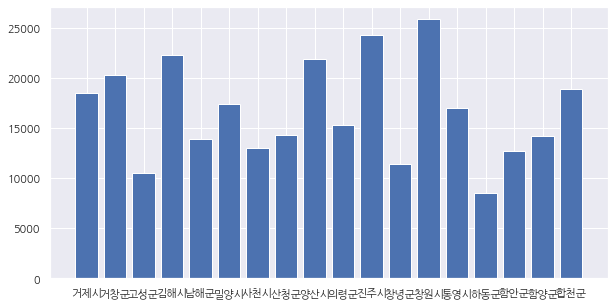

In [12]:
plt.figure(figsize=(10,5))
sns.set(font="NanumGothic", # 폰트 나눔고딕
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 방지
        style='darkgrid') # 검은 그리드
plt.bar(data4["시"],data4["돈"])
plt.show()